In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['ner-lists-87_citations-1000.csv']


### Importing the dataset for named entity recognition model

In [4]:
df = pd.read_csv('../input/ner-lists-87_citations-1000.csv')
df = df.fillna('')
df.head(20)

,sentence_idx,word,tag,pos,lemma
0,1,རྣམ་པ་,O,NOUN,རྣམ་པ་
1,1,ལྔ,O,OTHER,ལྔ་
2,1,འི་,O,PART,གི་
3,1,བ,O,PART,བ་
4,1,ར་,O,PART,ལ་
5,1,བཅོམ་པ,O,VERB,བཅོམ་པ་
6,1,། །,O,,
7,1,གཉིས་,O,OTHER,གཉིས་
8,1,པ་,O,PART,པ་
9,1,ལ་,O,PART,ལ་


In [5]:
data = df[['sentence_idx', 'word', 'pos', 'tag']]
data.head()

,sentence_idx,word,pos,tag
0,1,རྣམ་པ་,NOUN,O
1,1,ལྔ,OTHER,O
2,1,འི་,PART,O
3,1,བ,PART,O
4,1,ར་,PART,O


In [6]:
print("# sentences: ", len(data.groupby(['sentence_idx'])))

# sentences:  1178


In [7]:
words = list(set(data["word"].values))
n_words = len(words)
print("# words: ", n_words)

# words:  5168


In [8]:
tags = list(set(data["tag"].values))
n_tags = len(tags)
print("# Tags: ", n_tags)
print(tags)

# Tags:  11
['I-དབྱེ་གཞི།', 'B-དབྱེ་གཞི།', 'B-ལུང་ཚིག་དངོས།', 'I-དབྱེ་བ།', 'I-ལུང་དེའི་མཛད་པ་པོ།', 'B-དབྱེ་བ།', 'B-ལུང་དེའི་མཛད་པ་པོ།', 'O', 'I-ལུང་ཁུངས།', 'I-ལུང་ཚིག་དངོས།', 'B-ལུང་ཁུངས།']


### Essential info about entities:    
   - ལུང་ཁུངས།: source of citation
   - ལུང་དེའི་མཛད་པ་པོ།: author of the citation
   - ལུང་ཚིག་དངོས།: actual citation
   - དབྱེ་གཞི།: category name
   - དབྱེ་བ།: list of objects under the category

Create list of list of tuples to differentiate each sentence from each other

In [9]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(), s["tag"].values.tolist())]
        self.grouped = self.data.groupby("sentence_idx").apply(agg_func)
        self.sentences = [s for s in self.grouped]
        
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [10]:
getter = SentenceGetter(data)

In [11]:
sentences = getter.sentences
sentences[5]

[('བདག་', 'O'),
 ('གི་', 'O'),
 ('ལུས་ངག་', 'O'),
 ('ཡིད་', 'O'),
 ('གསུམ་', 'O'),
 ('བསྡམས་', 'O'),
 ('ན', 'O'),
 ('ས་', 'O'),
 ('དུལ་བ་', 'O'),
 ('དང་', 'O'),
 ('ལྡན་པ', 'O'),
 ('ས་', 'O'),
 ('གཞན་', 'O'),
 ('ཡང་', 'O'),
 ('དུལ་བ', 'O'),
 ('ར་', 'O'),
 ('བྱེད་', 'O'),
 ('ནུས་', 'O'),
 ('ཏེ', 'O'),
 ('། ', 'O'),
 ('མདོ་', 'B-ལུང་ཁུངས།'),
 ('ལ', 'O'),
 ('ས', 'O'),
 ('། ', 'O'),
 ('བདག་', 'B-ལུང་ཚིག་དངོས།'),
 ('མ་', 'I-ལུང་ཚིག་དངོས།'),
 ('གྲོལ་བ', 'I-ལུང་ཚིག་དངོས།'),
 ('ས་', 'I-ལུང་ཚིག་དངོས།'),
 ('སེམས་ཅན་', 'I-ལུང་ཚིག་དངོས།'),
 ('གཞན་', 'I-ལུང་ཚིག་དངོས།'),
 ('གྲོལ་བ', 'I-ལུང་ཚིག་དངོས།'),
 ('ར་', 'I-ལུང་ཚིག་དངོས།'),
 ('མི་', 'I-ལུང་ཚིག་དངོས།'),
 ('ནུས་', 'I-ལུང་ཚིག་དངོས།'),
 ('ལ', 'I-ལུང་ཚིག་དངོས།'),
 ('། ', 'I-ལུང་ཚིག་དངོས།'),
 ('དེ་བཞིན་', 'I-ལུང་ཚིག་དངོས།'),
 ('བདག་', 'I-ལུང་ཚིག་དངོས།'),
 ('མ་', 'I-ལུང་ཚིག་དངོས།'),
 ('ཞི་', 'I-ལུང་ཚིག་དངོས།'),
 ('ན་', 'I-ལུང་ཚིག་དངོས།'),
 ('གཞན་', 'I-ལུང་ཚིག་དངོས།'),
 ('ཞི་བ་', 'I-ལུང་ཚིག་དངོས།'),
 ('དང༌', 'I-ལུང་ཚིག་དངོས།'),
 ('། ', 'I-ལུང་ཚིག་དངོས།

In [12]:
max_len = max(len(s) for s in sentences)
max_len

440

In [13]:
# Check how long sentences are so that we can pad them
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

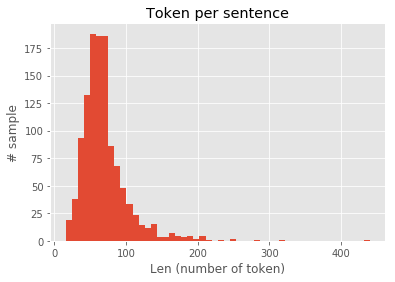

In [14]:
plt.hist([len(s) for s in sentences], bins=50)
plt.title('Token per sentence')
plt.xlabel('Len (number of token)')
plt.ylabel('# sample')
plt.show()

In [15]:
max_len = 150

In [16]:
words = list(set(data['word'].values))
words.append('ENDPAD')

In [17]:
n_words = len(words)
n_words

5169

In [18]:
tags = list(set(data['tag'].values))

In [19]:
n_tags = len(tags)
n_tags

11

# Prepare dataset

1. Convert token and tag into integers.
1. Pad the sentences and tags of sentence to max sentence length.
1. Convert tags into categorical value
1. Split data into train and test set.

### 1. Convert words into integers

In [20]:
word2idx = {w: i for i, w in enumerate(words)}
idx2word = {i: w for w, i in word2idx.items()}

tag2idx = {t: i for i, t in enumerate(tags)}
idx2tag = {i: w for w, i in tag2idx.items()}

In [21]:
word2idx['བདག་']

1796

In [22]:
idx2word[5168]

'ENDPAD'

### 2. Padding all the sequences and tags to create fix length sequences (max_len sentence)

In [23]:
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [24]:
X = [[word2idx[w] for w, t in s] for s in sentences]
X[0][:5]

[2511, 34, 728, 2083, 4477]

In [25]:
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=n_words - 1)

In [26]:
len(X[0]), len(X[1])

(150, 150)

In [27]:
X[0][-1]

5168

In [28]:
idx2word[5168]

'ENDPAD'

In [29]:
y = [[tag2idx[t] for w, t in s] for s in sentences]

In [30]:
len(y[0]), len(y[1])

(73, 63)

In [31]:
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [32]:
y.shape

(1178, 150)

In [33]:
len(y[0]), len(y[1])

(150, 150)

### 3. Convert tags into categorical value

In [34]:
from keras.utils import to_categorical

In [35]:
y = np.array([to_categorical(i, num_classes=n_tags) for i in y])

In [36]:
y.shape

(1178, 150, 11)

### 4. Split data into train and test set

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
print("# train set:", X_train.shape[0])
print("# test set:", X_valid.shape[0])

# train set: 942
# test set: 236


In [39]:
X_train.shape

(942, 150)

In [40]:
y_train.shape

(942, 150, 11)

## Build the Model

In [41]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras import backend as K

### Word Embedding:
- A word embedding is a class of approaches for representing words and documents using a `dense vector` representation.
- words are represented by dense vectors where a vector represents the projection of the word into a `continuous vector space`.
- The `position` of a word within the vector space is learned from text and is based on the words that surround the word when it is used.
- The position of a word in the learned vector space is referred to as its `embedding`.
- `Word2Vec` & `GloVe` are carefully designed and more efficient methods of learning word embeddings from text.
- But word embeddings can be learned as part of a `deep learning model`. This can be a `slower approach`, but `tailors` the model to a specific training dataset.

In [42]:
input = Input(shape=(150,))

#output of Embedding layer is 2D vector with one embedding for each word in the input sequence of words
X = Embedding(input_dim=n_words, output_dim=140, input_length=150)(input)
X = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(X)
out = TimeDistributed(Dense(n_tags, activation='softmax'))(X)

In [43]:
model = Model(input, out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 140)          723660    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 150, 200)          192800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 150, 11)           2211      
Total params: 918,671
Trainable params: 918,671
Non-trainable params: 0
_________________________________________________________________


## F1 metric

In [44]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1_m])

## Train the Model

In [46]:
epochs=20
bs=32

In [48]:
history = model.fit(X_train, y_train, batch_size=bs, epochs=epochs, validation_data=(X_valid, y_valid), verbose=1)

Train on 942 samples, validate on 236 samples
Epoch 1/20
942/942 [==============================] - 27s 28ms/step - loss: 1.1336 - acc: 0.7368 - f1_m: 0.5133 - val_loss: 0.4829 - val_acc: 0.8329 - val_f1_m: 0.7278
Epoch 2/20
942/942 [==============================] - 21s 22ms/step - loss: 0.4447 - acc: 0.8257 - f1_m: 0.8142 - val_loss: 0.4043 - val_acc: 0.8646 - val_f1_m: 0.8538
Epoch 3/20
942/942 [==============================] - 21s 22ms/step - loss: 0.3713 - acc: 0.8844 - f1_m: 0.8816 - val_loss: 0.3581 - val_acc: 0.8684 - val_f1_m: 0.8680
Epoch 4/20
942/942 [==============================] - 21s 22ms/step - loss: 0.2983 - acc: 0.9082 - f1_m: 0.9081 - val_loss: 0.3274 - val_acc: 0.8851 - val_f1_m: 0.8853
Epoch 5/20
942/942 [==============================] - 21s 22ms/step - loss: 0.2390 - acc: 0.9323 - f1_m: 0.9323 - val_loss: 0.3431 - val_acc: 0.8804 - val_f1_m: 0.8787
Epoch 6/20
942/942 [==============================] - 21s 22ms/step - loss: 0.2041 - acc: 0.9427 - f1_m: 0.9432 - 

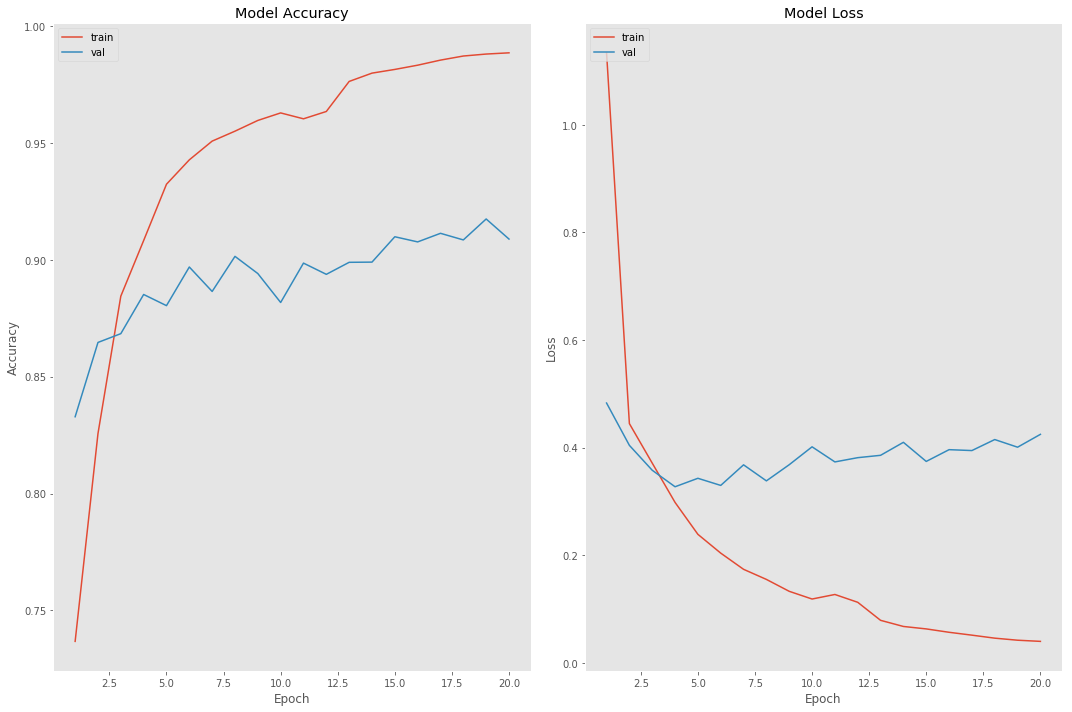

In [50]:
import matplotlib.pyplot as plt

trainAcc = history.history['acc']
trainLoss = history.history['loss']
valAcc = history.history['val_acc']
valLoss = history.history['val_loss']
epoch_it = np.arange(1,epochs+1)

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(epoch_it, trainAcc)
plt.plot(epoch_it, valAcc)
plt.title('Model Accuracy')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.subplot(122)
plt.plot(epoch_it, trainLoss)
plt.plot(epoch_it, valLoss)
plt.title('Model Loss')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

## Evaluate the model on test set

In [51]:
test_loss, test_acc, test_f1_m = model.evaluate(X_valid, y_valid)

236/236 [==============================] - 2s 8ms/step


In [52]:
print(f'Test loss: {test_loss:.4}')
print(f'Test acc: {test_acc:.4}')
print(f'Test f1 score: {test_f1_m:.4}')

Test loss: 0.4248
Test acc: 0.9088
Test f1 score: 0.9091


## Save the model

In [54]:
model.save('ner.h5')

### Do some predictions

In [55]:
from tabulate import tabulate

In [56]:
def inference(i):
    p = model.predict(np.array([X_valid[i]]))
    p = np.argmax(p, axis=-1)

    results = []
    for w,pred, gt in zip(X_valid[i],p[0], y_valid[i]):
        results.append([idx2word[w],idx2tag[pred], idx2tag[np.argmax(gt)]])

    print(tabulate(results, headers=["Word", "Predicted Entity", "Actual Entity"]))

In [57]:
inference(1)

Word     Predicted Entity    Actual Entity
-------  ------------------  ---------------
ཏིང་འཛིན་  I-ལུང་ཚིག་དངོས།        O
ལྟ        O                   O
ར་       O                   O
སྣང་བ     O                   O
འི་       O                   O
ལུས་གསུམ་  O                   O
སྣང་བྱེད་   O                   O
ཀྱི་       O                   O
གཞི་      O                   O
དང་      O                   O
བཞི       O                   O
ར་       O                   O
དབྱེ       I-ལུང་ཚིག་དངོས།        O
ར་       I-ལུང་ཚིག་དངོས།        O
རུང་      I-ལུང་ཚིག་དངོས།        O
སྟེ        I-ལུང་ཚིག་དངོས།        O
།        O                   O
ཐལ་འགྱུར་  I-ལུང་ཚིག་དངོས།        O
ལ        O                   O
ས        O                   O
།        O                   O
དབྱེ་      O                   O
ན་       I-ལུང་ཚིག་དངོས།        O
ལུས་      I-ལུང་ཚིག་དངོས།        O
དང་      I-ལུང་ཚིག་དངོས།        O
སྦྱོར་བ་    I-ལུང་ཚིག་དངོས།        O
དང༌      I-ལུང་ཚིག་དངོས།        O
། །      I-ལུང་

In [58]:
inference(100)

Word      Predicted Entity    Actual Entity
--------  ------------------  ----------------
དེས་ན་     O                   O
པོ་ཏོ་བ     B-ལུང་ཁུངས།           B-ལུང་དེའི་མཛད་པ་པོ།
འི་        I-ལུང་ཁུངས།           I-ལུང་དེའི་མཛད་པ་པོ།
ཞལ་       I-ལུང་དེའི་མཛད་པ་པོ།    I-ལུང་དེའི་མཛད་པ་པོ།
ན         O                   I-ལུང་དེའི་མཛད་པ་པོ།
ས         O                   I-ལུང་དེའི་མཛད་པ་པོ།
།         O                   O
ད་ལྟ་      B-ལུང་ཚིག་དངོས།        B-ལུང་ཚིག་དངོས།
མི་ནག་     I-ལུང་ཚིག་དངོས།        I-ལུང་ཚིག་དངོས།
པ་        I-ལུང་ཚིག་དངོས།        I-ལུང་ཚིག་དངོས།
ཀུན་       I-ལུང་ཚིག་དངོས།        I-ལུང་ཚིག་དངོས།
གྱི         I-ལུང་ཚིག་དངོས།        I-ལུང་ཚིག་དངོས།
ས་        I-ལུང་ཚིག་དངོས།        I-ལུང་ཚིག་དངོས།
གཉེན་      I-ལུང་ཚིག་དངོས།        I-ལུང་ཚིག་དངོས།
འདམ་པ་    I-ལུང་ཚིག་དངོས།        I-ལུང་ཚིག་དངོས།
རེ་        I-ལུང་ཚིག་དངོས།        I-ལུང་ཚིག་དངོས།
ལ་        I-ལུང་ཚིག་དངོས།        I-ལུང་ཚིག་དངོས།
ཡང་       I-ལུང་ཚིག་དངོས།        I-ལུང་ཚིག་དངོས།
རྟོག་དཔྱོད་   I-ལུང་ཚིག་དངོས།   